-- Project still active, see current status --

Our aim in this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. We’re working as data analysts for a company that builds Android and iOS mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build. At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

Additional questions:
- Are there any major differences between the markets for iOS and Android apps?
- If we were about to release the app as a paid version, how much should we charge?


Current Status:
1. Android data cleaned
2. Android analysis almost completed.

iOS Analysis and final conclusion still pending

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

%matplotlib inline

# I. Android dateset
Read in dataset.
Orientation.
Data Cleaning.

In [2]:
android=pd.read_csv("googleplaystore.csv")

In [3]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Questions:
    - Why do some apps have no rating value? Are these just apps that have not been rated (e.g. unpopular apps) or does this reflect some kind of error?
    - Is the size always stated in MB?
    - What increments are install numbers stated in? Can I just transform them into a numeric type?
    - What currency are prices stated in? Can I just transform them into a numeric type?
    - Is there a benefit from transforming the dates to dt objects?

First Data Cleaning steps before resolving the questins entirely:
- Iterate through the columns and transform them to the appropriate dtype. This should already answer some of the questions.

Reviews
-----------

In [5]:
android[android["Reviews"].str.contains("[^\d\s]+")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This entry has a faulty read-in. It can be dropped (low rating, not a lot of installs).

In [6]:
android.drop(10472, inplace=True)

In [7]:
android["Reviews"]=pd.to_numeric(android["Reviews"])

Size
-------

In [8]:
android["Size"].str.extract(r"([^\d\s]+)")[0].unique()

array(['M', '.', 'Varies', 'k'], dtype=object)

In [9]:
android.loc[android["Size"].str.contains("Varies"),"Size"].unique()

array(['Varies with device'], dtype=object)

In [10]:
android.loc[android["Size"].str.contains("k"),"Size"]=android.loc[android["Size"].str.contains("k"),"Size"].apply(lambda x:str((float(x.replace("k",""))/1024)))

In [11]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
android["Size"]=(android["Size"]
                 .str.replace("M","")
                 .str.replace("Varies with device","")
                 .str.replace("nan","")
                 .str.replace("+","")
                 .str.replace(",","")
                 .str.strip()
                )

In [13]:
android["Size"]=pd.to_numeric(android["Size"])

In [14]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Installs
-----------

In [15]:
android["Installs"].str.extract(r"([^\d\s]+)")[0].unique()

array([',', '+', nan], dtype=object)

In [16]:
android["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
android["Installs"]=(android["Installs"]
                     .str.replace(",","")
                     .str.replace("+","")
                     .str.strip()
                    )

In [18]:
android["Installs"]=pd.to_numeric(android["Installs"])

Price
------

In [19]:
android["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
android["Price"]=android["Price"].str.replace("$","")

In [21]:
android["Price"]=pd.to_numeric(android["Price"])

Last Updated
------

Changing the content of this column to a dt object allows us to identify and visualize older apps.

In [22]:
android["Last Updated"]=pd.to_datetime(android["Last Updated"])

This seems to conclude the data cleaning process. Time to check the dataset again.

In [23]:
android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              9145 non-null float64
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null datetime64[ns]
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


The dtypes seem fine now.
Lets get to the missing values

1. Missing Values of Rating

Does this just reflect unrated (e.g. unpopular apps?)

In [24]:
(android.loc[android["Rating"].isnull()==True,"Installs"]==0).sum()/android.loc[android["Rating"].isnull()==True,"Installs"].shape[0]

0.0101763907734057

Only about 1% have no installs

In [25]:
(android.loc[android["Rating"].isnull()==True,"Installs"].isnull()==True).sum()/android.loc[android["Rating"].isnull()==True,"Installs"].shape[0]

0.0

No NaNs.

In [26]:
android.loc[android["Rating"].isnull()==True,"Installs"].median()

100.0

In [27]:
android.loc[android["Rating"].isnull()==False,"Installs"].median()

500000.0

But they are by far less popular!

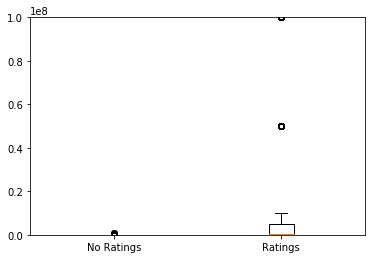

In [28]:
x=android.loc[android["Rating"].isnull()==True,"Installs"]
y=android.loc[android["Rating"].isnull()==False,"Installs"]

plt.boxplot(x=[x,y],labels=["No Ratings","Ratings"])
plt.ylim(0,100000000)
plt.show()

They do not even fit in the same diagram. Half of these apps have not even been downloaded a 100 times. They can be dropped.

In [29]:
android.dropna(inplace=True,subset=["Rating"])

2. Missing values of Size

Those represent sizes that vary with the used device (see above)

3. Missing values of Type, Current Ver, Android Ver

In [30]:
android.dropna(inplace=True,subset=["Type","Current Ver","Android Ver"])

In [31]:
android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              7723 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null datetime64[ns]
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1023.8+ KB


Lets have a second look at the questions from the beginning:

Questions:
    - Why do some apps have no rating value? Are these just apps that have not been rated (e.g. unpopular apps) or does this reflect some kind of error?

#### Unpopular apps.
    
    - Is the size always stated in MB?
    
#### No, but it has been normalized to MB.

    - What increments are install numbers stated in? Can I just transform them into a numeric type?
    
#### There are summarized steps. Yes the can be transformed to a numeric type. But it should be remembered, that these are no exact values.

    - What currency are prices stated in? Can I just transform them into a numeric type?
    
#### USD. Yes, they can just be transformed.

    - Is there a benefit from transforming the dates to dt objects?
    
#### Yes and they have been transformed.

Checking for duplicates.

In [32]:
android.duplicated(subset="App").sum()

1170

At least some apps seem to have "duplicate" entries, which seem to only vary in the number of reviews. Lets investigate those duplicates and try to find out, why they exist.

In [33]:
android.duplicated(subset="App",keep=False).sum()

1959

There are 1170 duplicates by name in the dataset, counting all apps that have at least two occurances we have 1959. This is about 1/8th of the whole dataset or 10 percent respectively (Some even have 3 or more occurences). This bears the risk that our analysis can be skewed by these duplicate entries.

In [34]:
android[android.duplicated(subset="App",keep=False)].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38.0,10000000,Free,0.00,Everyone,Weather,2018-08-06,Varies with device,Varies with device


It seems that this is not a reflection of different similar named apps, but merely a mistake in the dataset. Lets verify our assumption by looking at duplicatet entries in different rows.

In [35]:
android.duplicated(subset=["App","Reviews"]).sum()

482

More than half of the apps do not have the same no of reviews.

In [36]:
android.duplicated(subset=["App","Last Updated"]).sum()

1127

Only a minority of entries seem to have a different version date.

In [37]:
android.duplicated(subset=["App","Current Ver"]).sum()

1145

And an even smaller number has a different version.

Tieing all this information together we can conclude, that the removal of the duplicates is a safe and neccessary step because it is merely a reflection of a read-in error.

In [38]:
android.drop_duplicates(inplace=True, subset="App")

In [39]:
android.shape[0]

8190

1170 Rows have succesfully been dropped.

In [40]:
android.duplicated(subset="App").sum()

0

## Analysis

The goal is to find a suitable market for an app that generates a lot of users. We need to identify the characteristics of an app that meets this requirement.

1. Identifying the most popular app categories

In [41]:
order_by_mean=list(android.pivot_table(index="Category",values="Installs",aggfunc="mean").sort_values(by="Installs",ascending=False).index)

In [42]:
order_by_median=list(android.pivot_table(index="Category",values="Installs",aggfunc="median").sort_values(by="Installs",ascending=False).index)

In [43]:
order_by_sum=list(android.pivot_table(index="Category",values="Installs",aggfunc="sum").sort_values(by="Installs",ascending=False).index)

In [44]:
order_by_name=list(android["Category"].unique())

First lets have a look at the download sums.

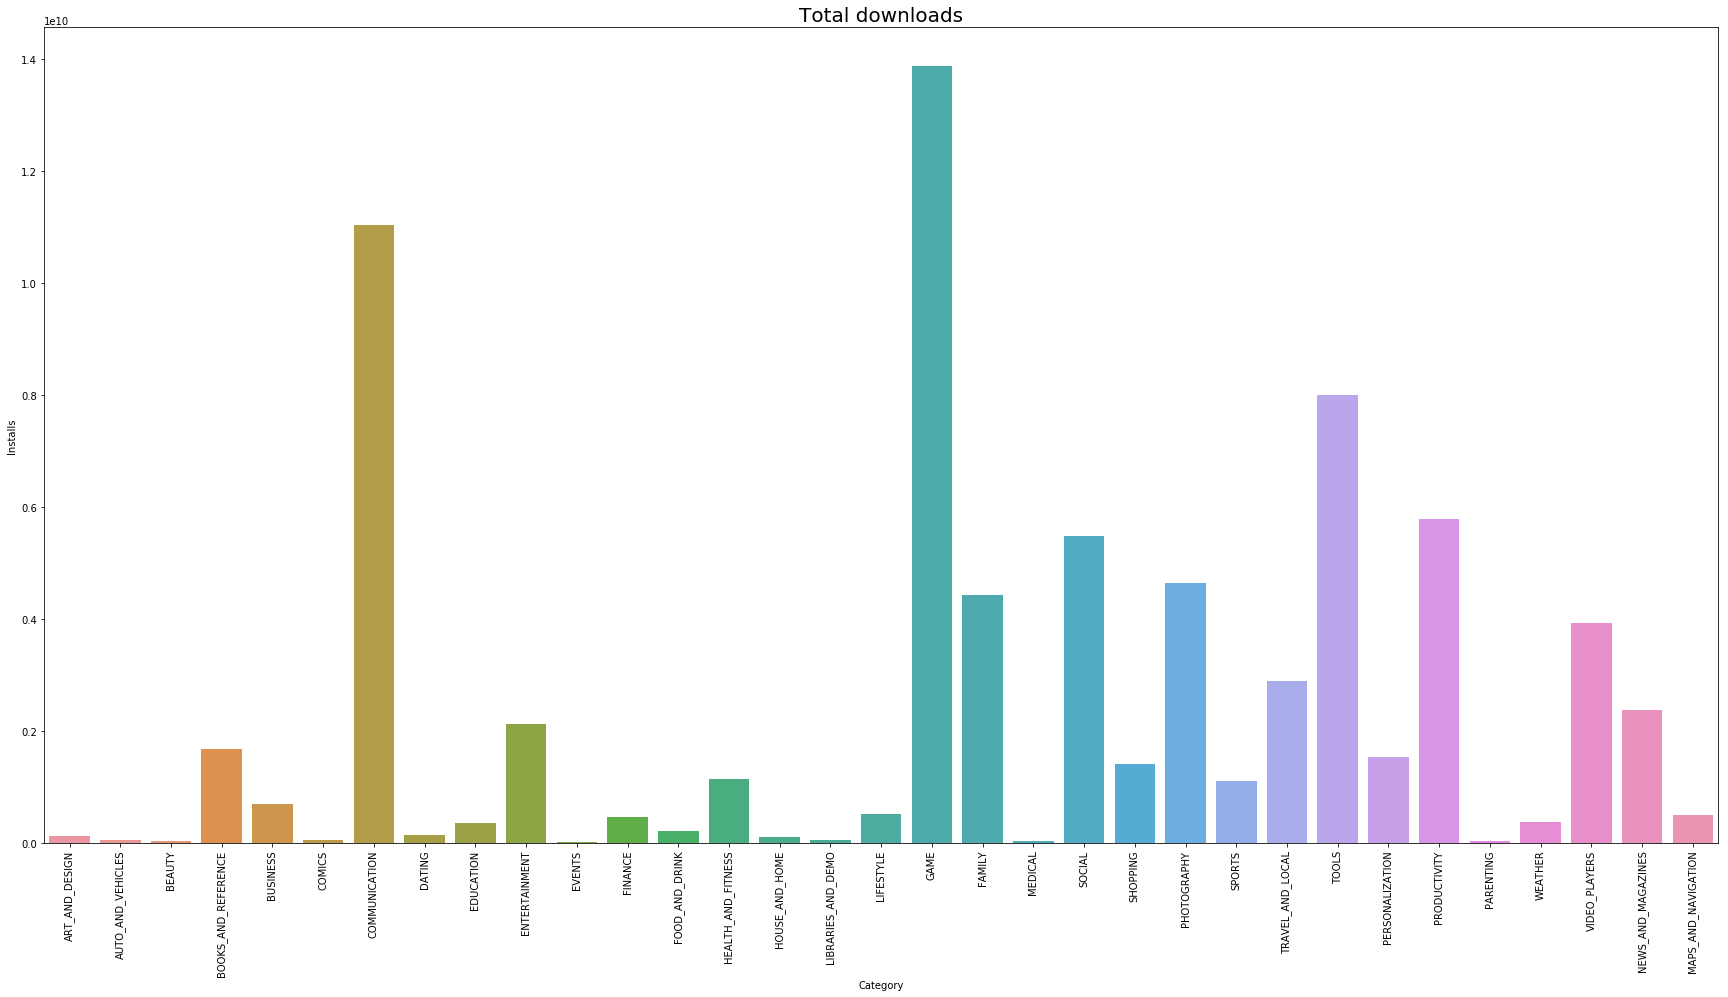

In [45]:
fig, ax=plt.subplots(figsize=(30,15))
sns.barplot(x="Category",y="Installs",data=android,ax=ax, order=order_by_name,ci=None,estimator=np.sum)
plt.xticks(rotation=90)
plt.title("Total downloads",fontdict={"fontsize":20})
plt.show()

The game cotegory has the most downloads, trailed by the Communication Category, the Tools Category and the productivity category.

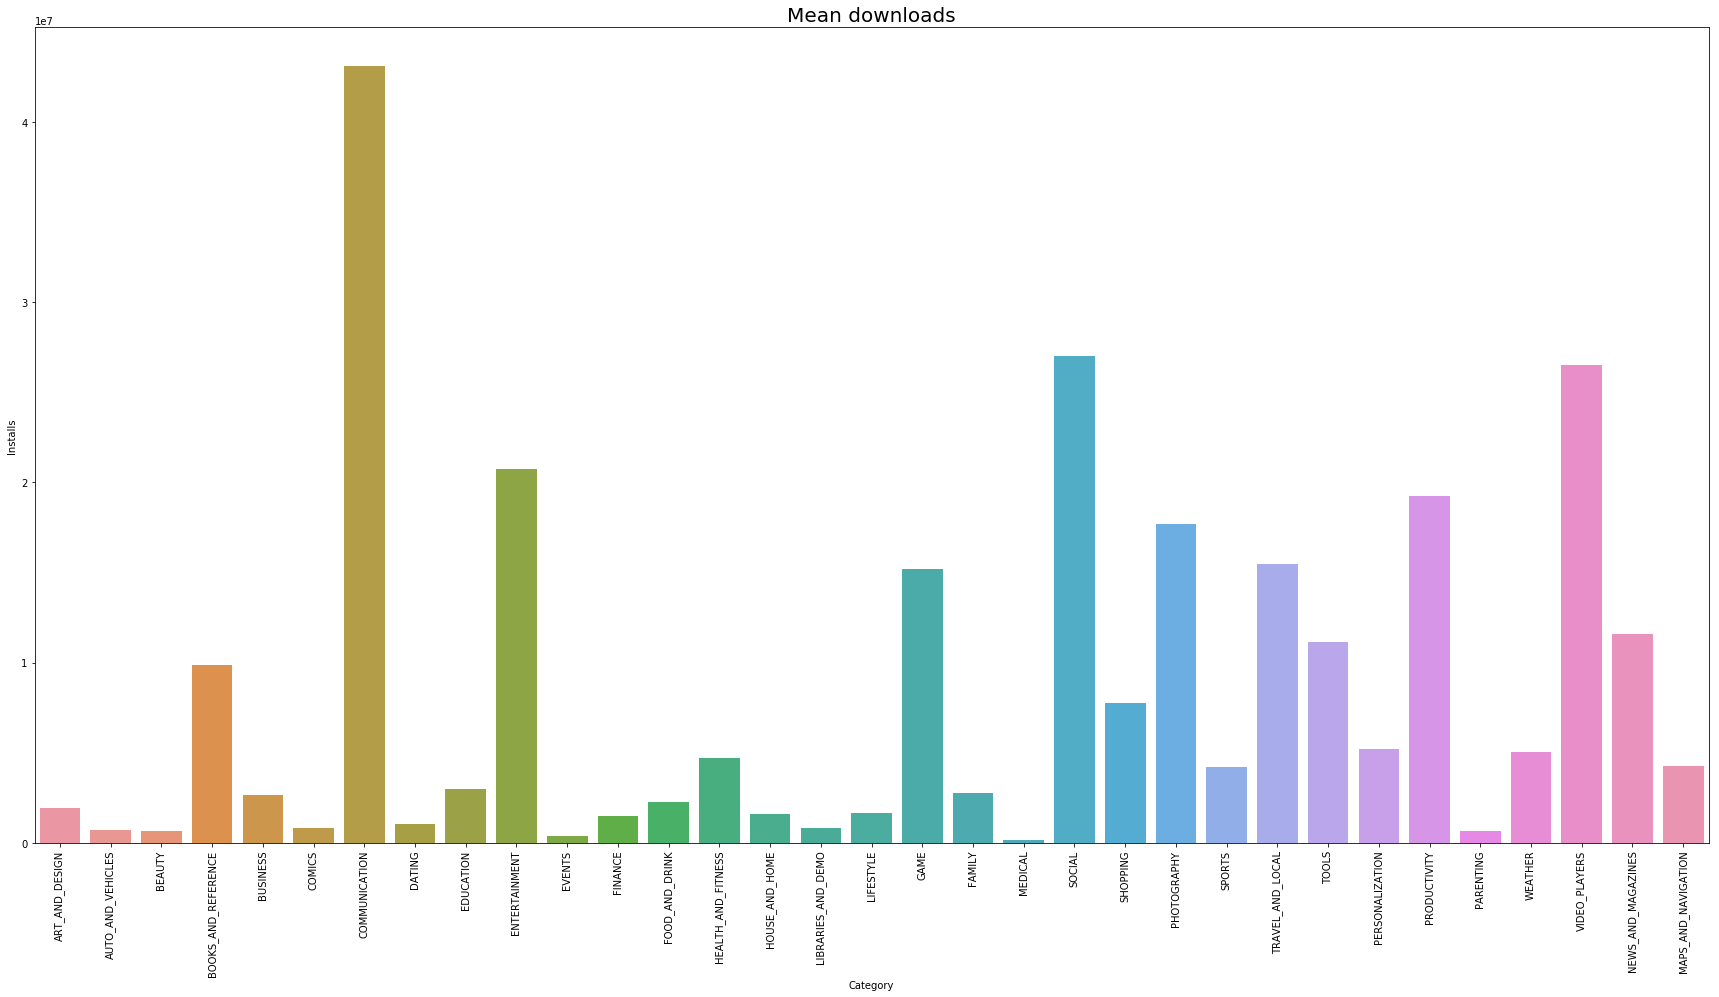

In [46]:
fig, ax=plt.subplots(figsize=(30,15))
sns.barplot(x="Category",y="Installs",data=android,ax=ax,ci=None, order=order_by_name)
plt.xticks(rotation=90)
plt.title("Mean downloads",fontdict={"fontsize":20})
plt.show()

How does the median change our results

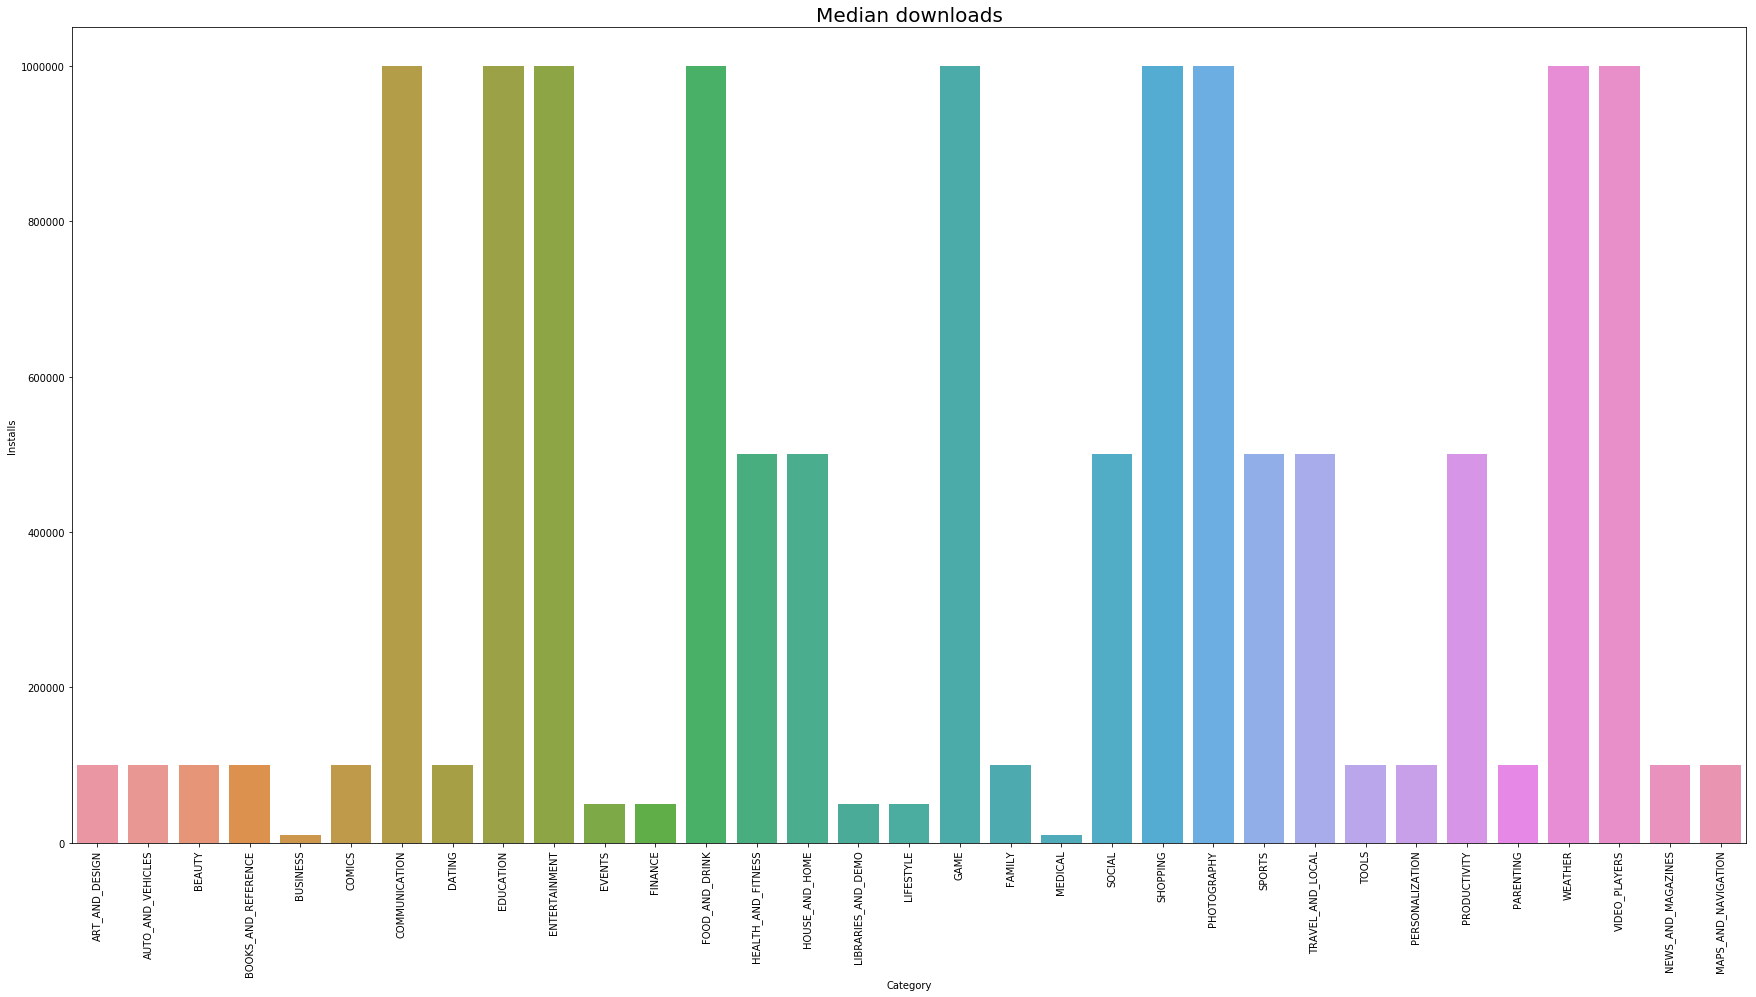

In [47]:
fig, ax=plt.subplots(figsize=(30,15))
sns.barplot(x="Category",y="Installs",data=android,ax=ax,estimator=np.median,ci=None,order=order_by_name)
plt.xticks(rotation=90)
plt.title("Median downloads",fontdict={"fontsize":20})
plt.show()

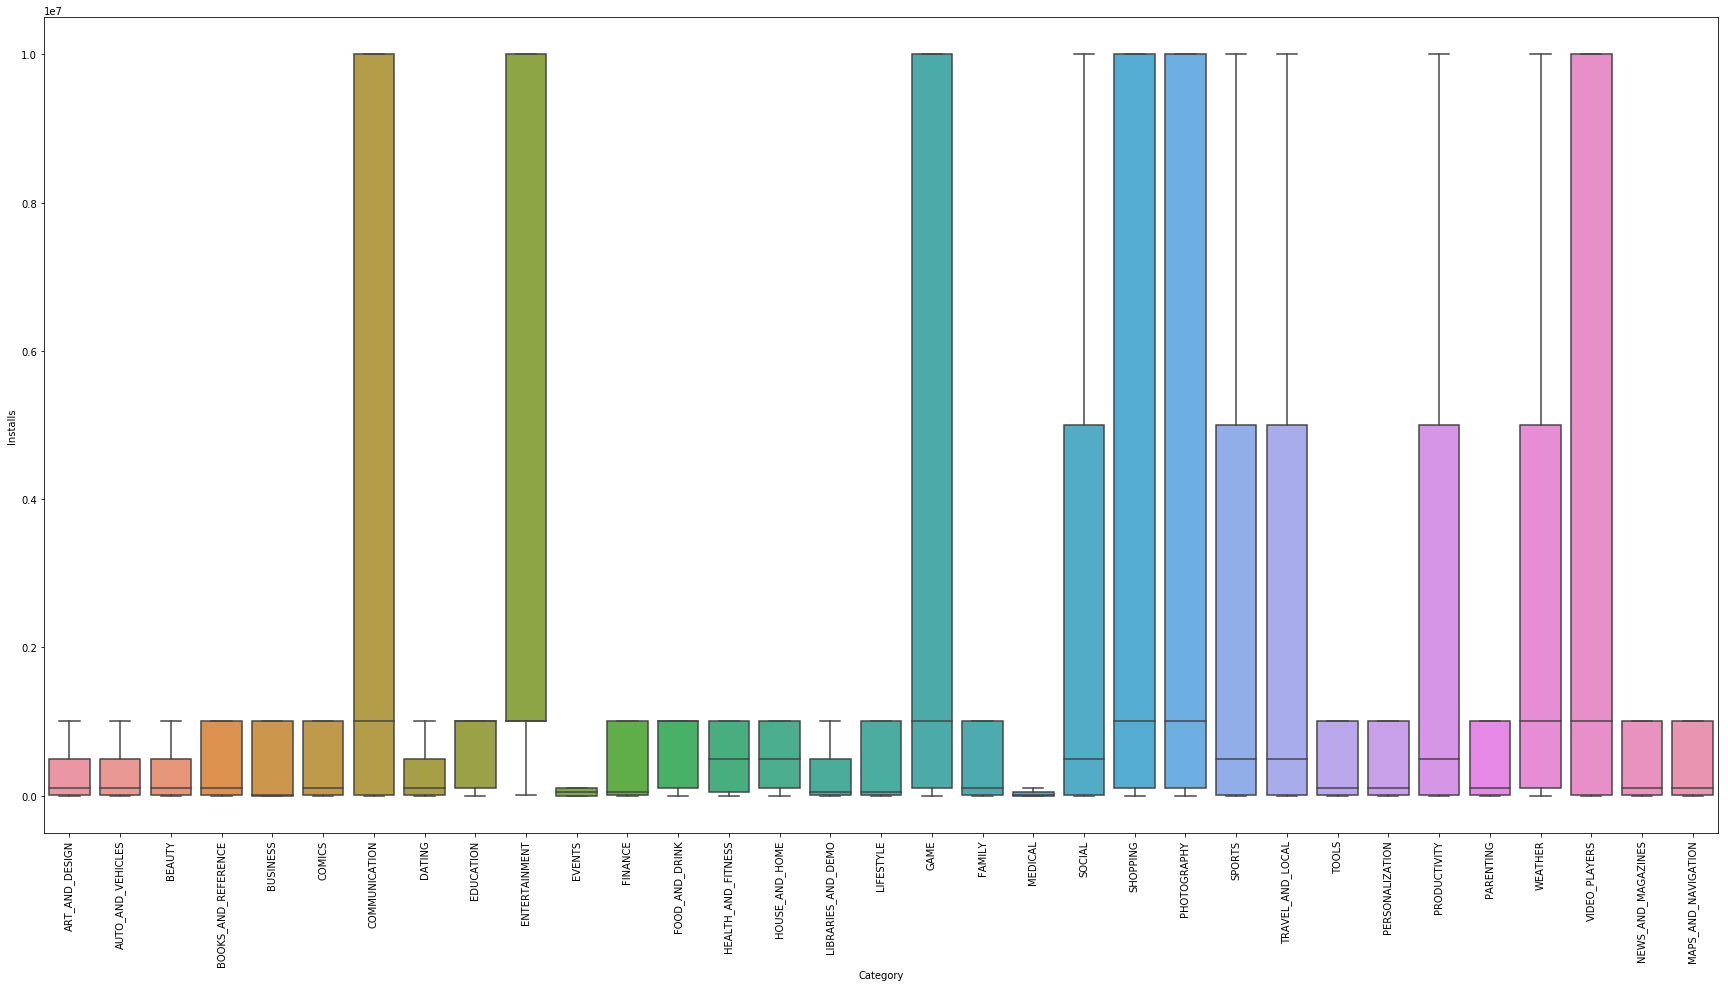

In [48]:
fig, ax=plt.subplots(figsize=(30,15))
sns.boxplot(x="Category",y="Installs",data=android,ax=ax,showfliers=False, order=order_by_name)
plt.plot()
plt.xticks(rotation=90)
plt.show()

Lets analyse the distribution further by adding a Gini Coefficient.

In [49]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [50]:
gini_category={}
for u in android["Category"].unique():
    gini_category[u]=gini(list(android.loc[android["Category"]==u,"Installs"]))

In [108]:
gini_category=pd.Series(gini_category).sort_values()
mean_downloads_category=android.pivot_table(index="Category",values="Installs",aggfunc="mean")
mean_downloads_category=mean_downloads_category.loc[list(gini_category.index)]

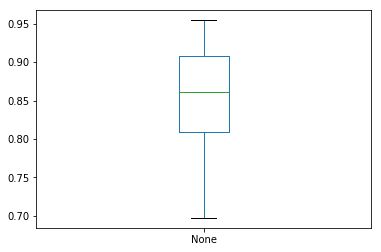

In [52]:
gini_category.plot.box()

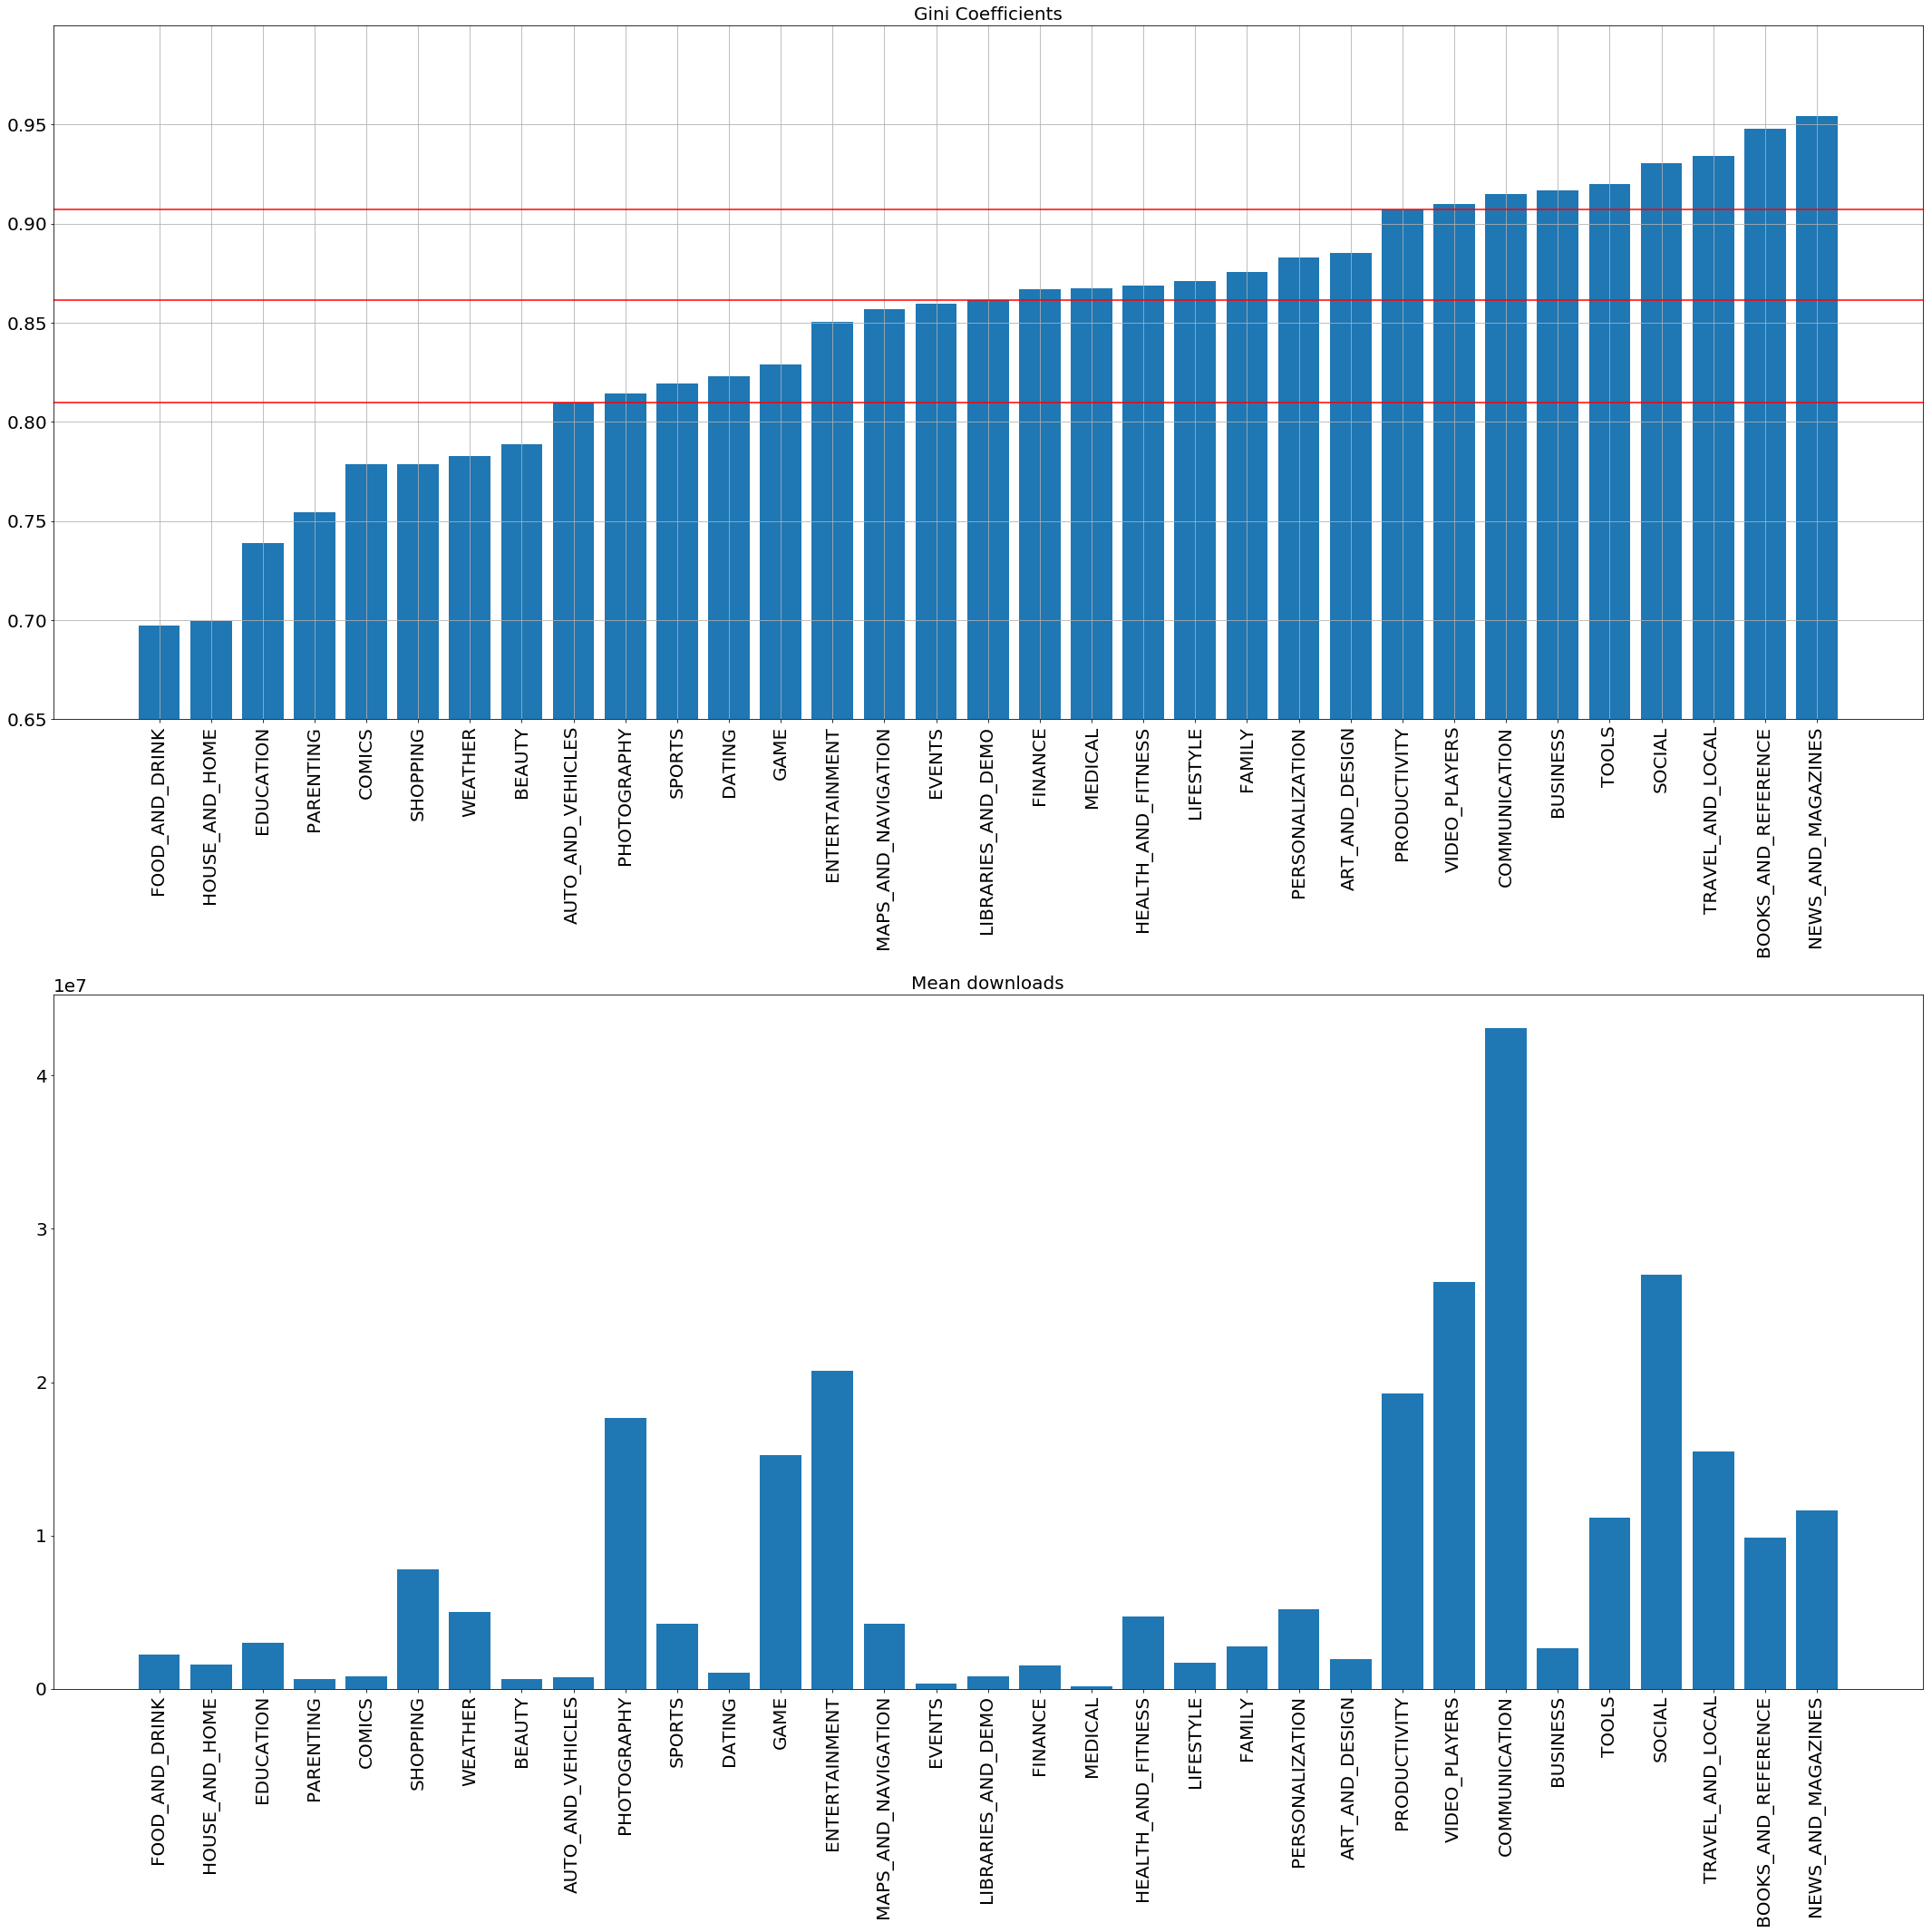

In [107]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
plt.bar(gini_category.index,gini_category)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1,.05))
plt.ylim(.65,1)

plt.axhline(gini_category.describe()["25%"],color="red")
plt.axhline(gini_category.describe()["50%"],color="red")
plt.axhline(gini_category.describe()["75%"],color="red")

plt.title("Gini Coefficients",fontdict={"fontsize":20})
plt.grid(b=True)

plt.subplot(2,1,2)
plt.bar(mean_downloads_category.index,mean_downloads_category["Installs"])
plt.xticks(rotation=90)
plt.title("Mean downloads",fontdict={"fontsize":20})

plt.tight_layout()
plt.show()

First of all we have to conclude that in all categories the majority of downloads are produced by just a few apps. That is the set of boundaries we have to operate in. However we are still able to differentiate and find categories, that provide downloads for moderately successful apps.

Game seems to be especially interesting. It has a lot of downloads and compared to the other categories a fairly equal distribution of downloads.
Communication produces a lot of downloads but the distribution is fairly unequal. That might be because of just a few very successful apps. Lets analyse this further

In [56]:
android[android["Category"]=="COMMUNICATION"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device


In [57]:
android.pivot_table(index="Category",values="Installs",aggfunc="mean").sort_values(by="Installs",ascending=False)

,Installs
Category,
COMMUNICATION,4.311813e+07
SOCIAL,2.703370e+07
VIDEO_PLAYERS,2.653241e+07
ENTERTAINMENT,2.072216e+07
PRODUCTIVITY,1.924608e+07
PHOTOGRAPHY,1.767735e+07
TRAVEL_AND_LOCAL,1.548053e+07
GAME,1.521794e+07
NEWS_AND_MAGAZINES,1.161329e+07


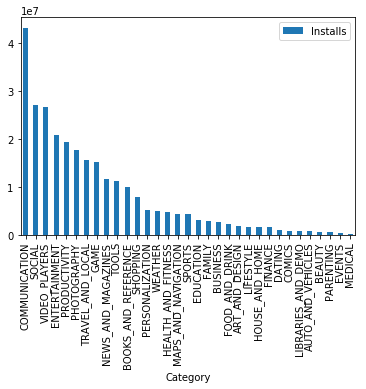

In [58]:
android.pivot_table(index="Category",values="Installs",aggfunc="mean").sort_values(by="Installs",ascending=False).plot.bar()
plt.show()

In [59]:
android[android["Category"]=="COMMUNICATION"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,NaN,500000000,Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device


In [60]:
t15_comm_installs=android[android["Category"]=="COMMUNICATION"].sort_values(by="Installs",ascending=False).head(15)["Installs"].sum()

In [61]:
comm_installs=android[android["Category"]=="COMMUNICATION"]["Installs"].sum()

In [62]:
t15_comm_installs/comm_installs

0.8062878471911821

The top 15 comm apps represent about 80% of all installs.

Creating a function for this kind of task. This allows me to visualize and analyze this in a quick manner for different categories.

In [63]:
def sum_share_top_apps(category,no_of_apps):
    share=android[android["Category"]==category].sort_values(by="Installs",ascending=False).head(no_of_apps)["Installs"].sum()
    total=android[android["Category"]==category]["Installs"].sum()
    return share/total

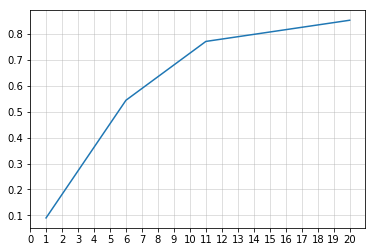

In [64]:
x=[]
y=[]
for i in reversed(range(1,21)):
    y.append(sum_share_top_apps("COMMUNICATION",i))
    x.append(i)
    
plt.plot(x,y)
plt.xticks(range(0,21))
plt.grid(b=True,alpha=.5)
plt.show()

Well it would be nice to have this integrated in a function as well

In [65]:
def plot_sum_share(category,no_of_apps):
    x=[]
    y=[]
    for i in reversed(range(1,no_of_apps+1)):
        y.append(sum_share_top_apps(category,i))
        x.append(i)
    
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 20})
    
    plt.plot(x,y)
    plt.xticks(range(0,no_of_apps+1))
    plt.grid(b=True,alpha=.5)
    plt.title("Share for {} installs by top apps".format(category),fontdict={"fontsize":24})
    plt.xlabel("No of apps")
    plt.ylabel("Share")
    plt.show()

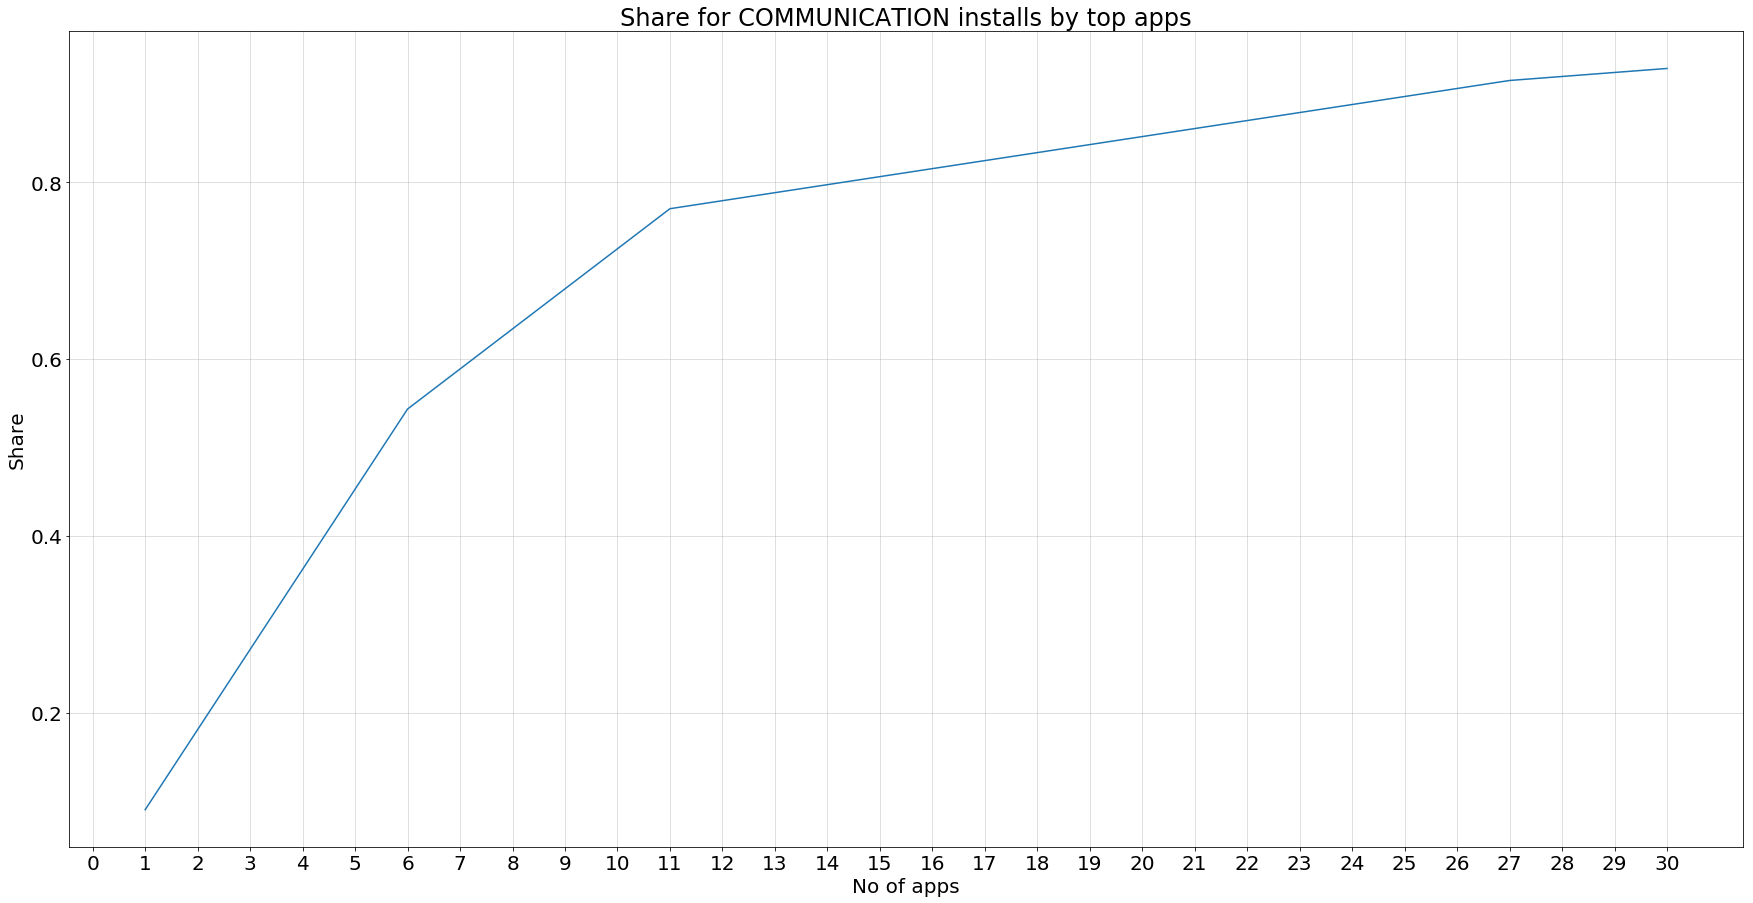

In [66]:
plot_sum_share("COMMUNICATION",30)

In [67]:
android[android["Category"]=="COMMUNICATION"].shape[0]

256

In [68]:
11/256

0.04296875

Lets remove the "giants" and look at the average installs.

In [69]:
android[android["Category"]=="COMMUNICATION"].sort_values(by="Installs",ascending=False).iloc[12:]["Installs"].median()

1000000.0

More than one million is a rather good download number for the rest of the apps. Lets save those numbers for later.

In [70]:
median_installs_cleaned={"Communication":android[android["Category"]=="COMMUNICATION"].sort_values(by="Installs",ascending=False).iloc[12:]["Installs"].median()}

In [71]:
median_installs_cleaned

{'Communication': 1000000.0}

We can conclude that communicaton apps make up the most successful apps. However most installs are related to just a small number of applications. Eleven apps (about 4%) contribute to almost 80% of all the installs. All of the most succesfull apps are free apps. The most sucessfull apps have a rating of 4.0 and above, which can be interpreted as a general user contentment.

While this allows to draw the conclusion that a successfull comm app might be good opportunity to produce a lot of installs, which in turn can lead to high ad revenue, we still have to take the market situation into consideration.
Communication apps work through reciprocity, which means the morse user use your app the more likely that other users will use it as well. So entering the market as an "outsider" might be a hard thing to do. All the market entrances of the recent past were due to general growth, some kind of cross-integration (e.g. FB Messenger, Google Hangouts in Android) or on the basis of brand new features. Furthermore the general user satisfaction seems to be good.

So I would advice against the creation of a communication as long as we are not able to make effective use of new-born user dissatisfaction, the integration of an import new feature or some kind of successfull cross-integration. 

### Lets have a look at the games category

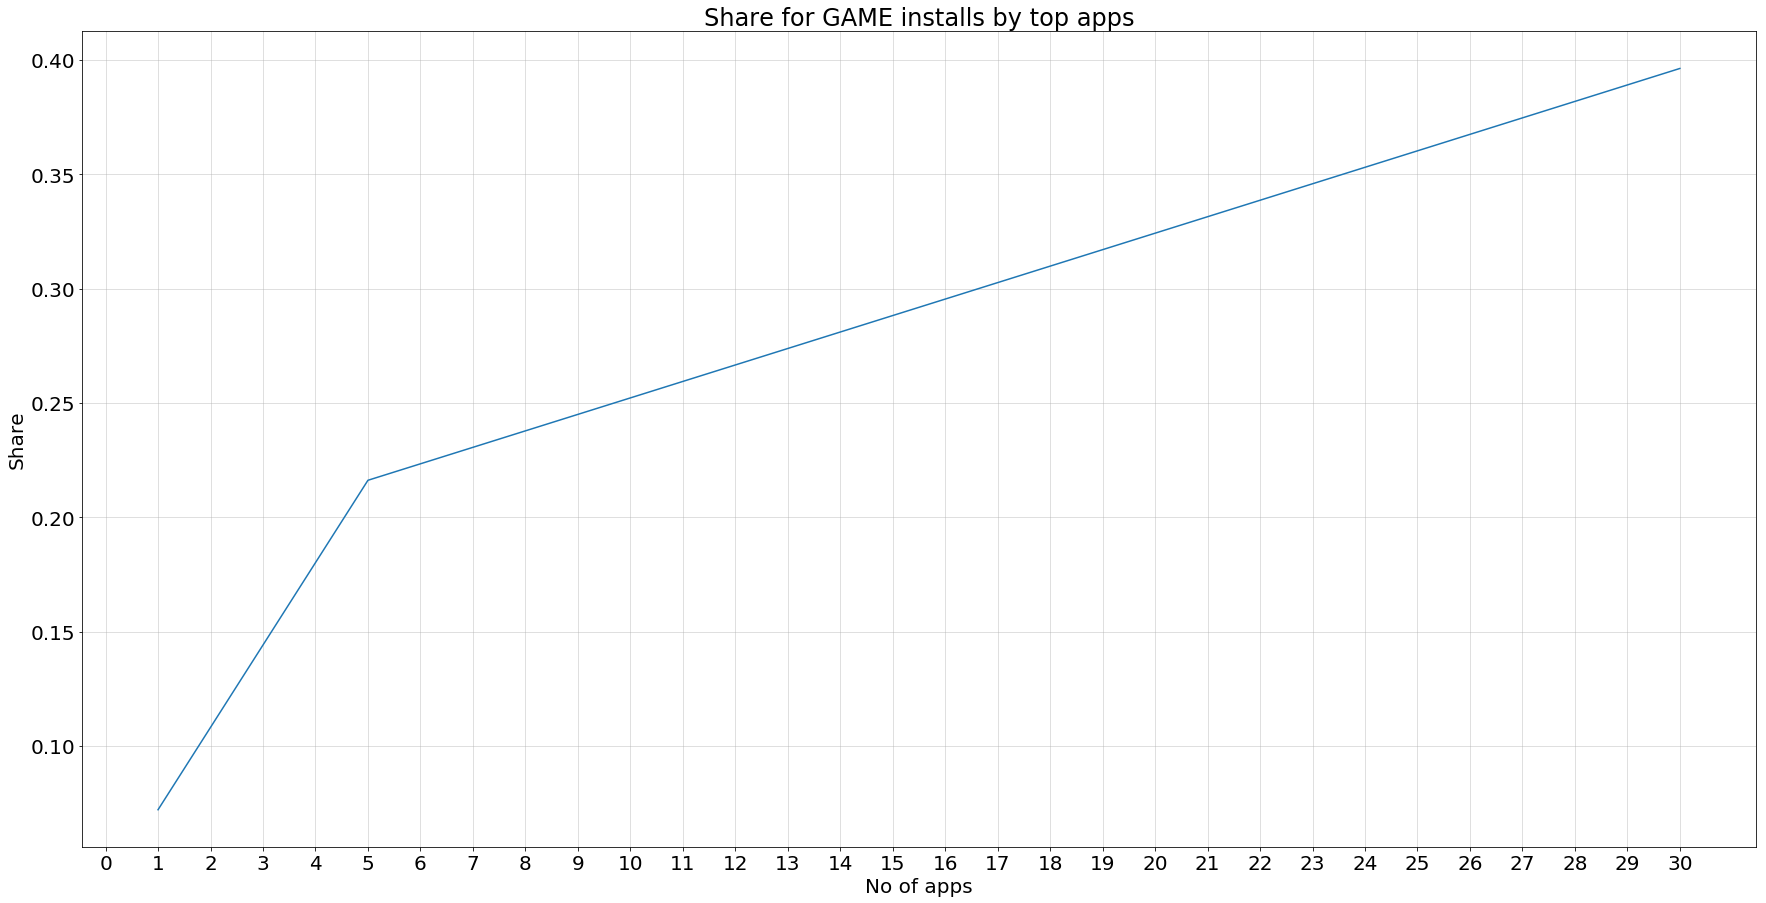

In [72]:
plot_sum_share("GAME",30)

Thats interesting. Just as the Gini coefficient hinted at, there are about 5 very successfull app that contribute to >20% of all downloads, however the rest is distributed rather equally among the remaining apps

In [73]:
android[android["Category"]=="GAME"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1722,My Talking Tom,GAME,4.5,14891223,NaN,500000000,Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1709,Score! Hero,GAME,4.6,5418675,96.0,100000000,Free,0.0,Everyone,Sports,2018-06-13,1.751,4.4 and up
1932,Shadow Fight 2,GAME,4.6,10979062,88.0,100000000,Free,0.0,Everyone 10+,Action,2018-07-02,1.9.38,3.0 and up
1737,Talking Tom Gold Run,GAME,4.6,2698348,78.0,100000000,Free,0.0,Everyone,Action,2018-07-31,2.8.2.59,4.1 and up
1736,Roll the Ball® - slide puzzle,GAME,4.5,1385093,35.0,100000000,Free,0.0,Everyone,Puzzle,2018-08-02,1.7.40,4.1 and up


The most successful apps are free apps.

In [74]:
android[android["Category"]=="GAME"]["Type"].value_counts(normalize=True)

Free    0.916667
Paid    0.083333
Name: Type, dtype: float64

More than 90% of the apps are free apps.

That seems suitable for our needs. Lets remove the "giants" and save the median.

In [75]:
median_installs_cleaned["Game"]=android[android["Category"]=="GAME"].sort_values(by="Installs", ascending=False).iloc[5:,:]["Installs"].median()

In [76]:
median_installs_cleaned

{'Communication': 1000000.0, 'Game': 1000000.0}

### So lets look at another important category: Social apps

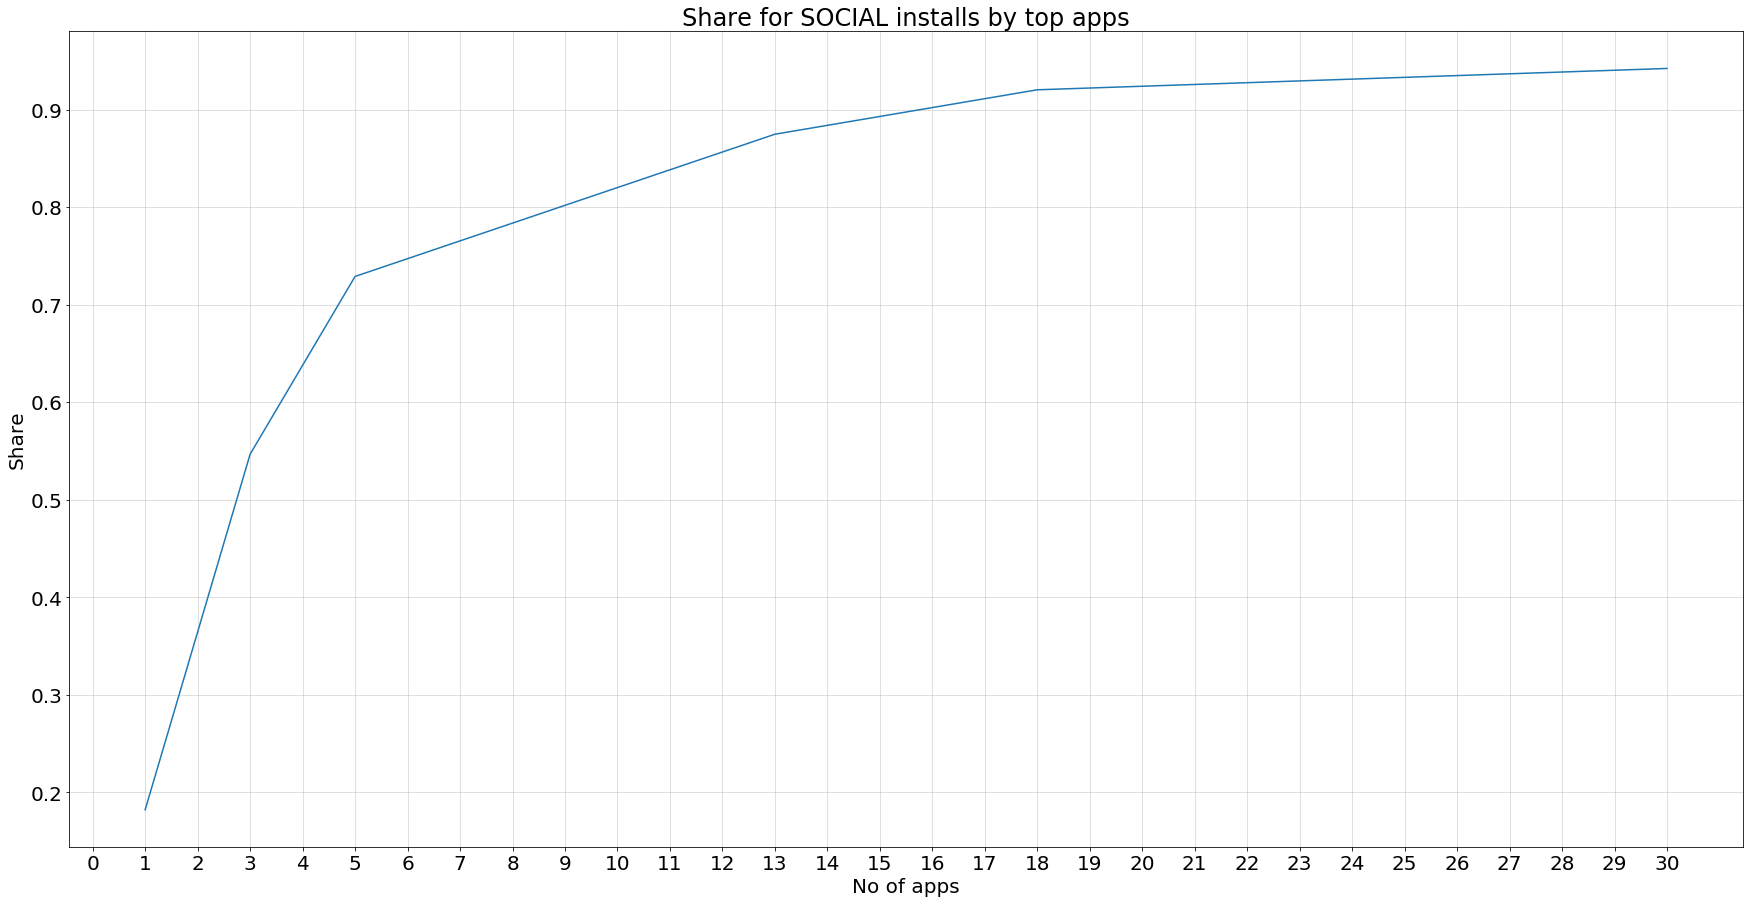

In [77]:
plot_sum_share("SOCIAL",30)

In [78]:
android[android["Category"]=="SOCIAL"].sort_values(by="Installs",ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,NaN,500000000,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device
2550,Snapchat,SOCIAL,4.0,17014787,NaN,500000000,Free,0.0,Teen,Social,2018-07-30,Varies with device,Varies with device
2588,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,NaN,100000000,Free,0.0,Mature 17+,Social,2018-08-02,Varies with device,Varies with device
2582,LinkedIn,SOCIAL,4.2,1225339,NaN,100000000,Free,0.0,Everyone,Social,2018-08-02,4.1.202,5.0 and up
6373,VK,SOCIAL,3.8,5793284,NaN,100000000,Free,0.0,Mature 17+,Social,2018-08-03,Varies with device,Varies with device
2592,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,NaN,100000000,Free,0.0,Mature 17+,Social,2018-08-01,Varies with device,Varies with device
3951,BIGO LIVE - Live Stream,SOCIAL,4.4,2349421,39.0,100000000,Free,0.0,Teen,Social,2018-07-27,4.1.0,4.0 and up


In [79]:
android[android["Category"]=="SOCIAL"].shape[0]

203

In [80]:
5/203

0.024630541871921183

This category has the same problems as the communication category. The concentration of installs on a few apps seem to be even more extreme.

In [81]:
android[android["Category"]=="SOCIAL"].sort_values(by="Installs",ascending=False).iloc[5:]["Installs"].median()

500000.0

In [82]:
median_installs_cleaned["Social"]=android[android["Category"]=="SOCIAL"].sort_values(by="Installs",ascending=False).iloc[5:]["Installs"].median()

### Lets look at video players.

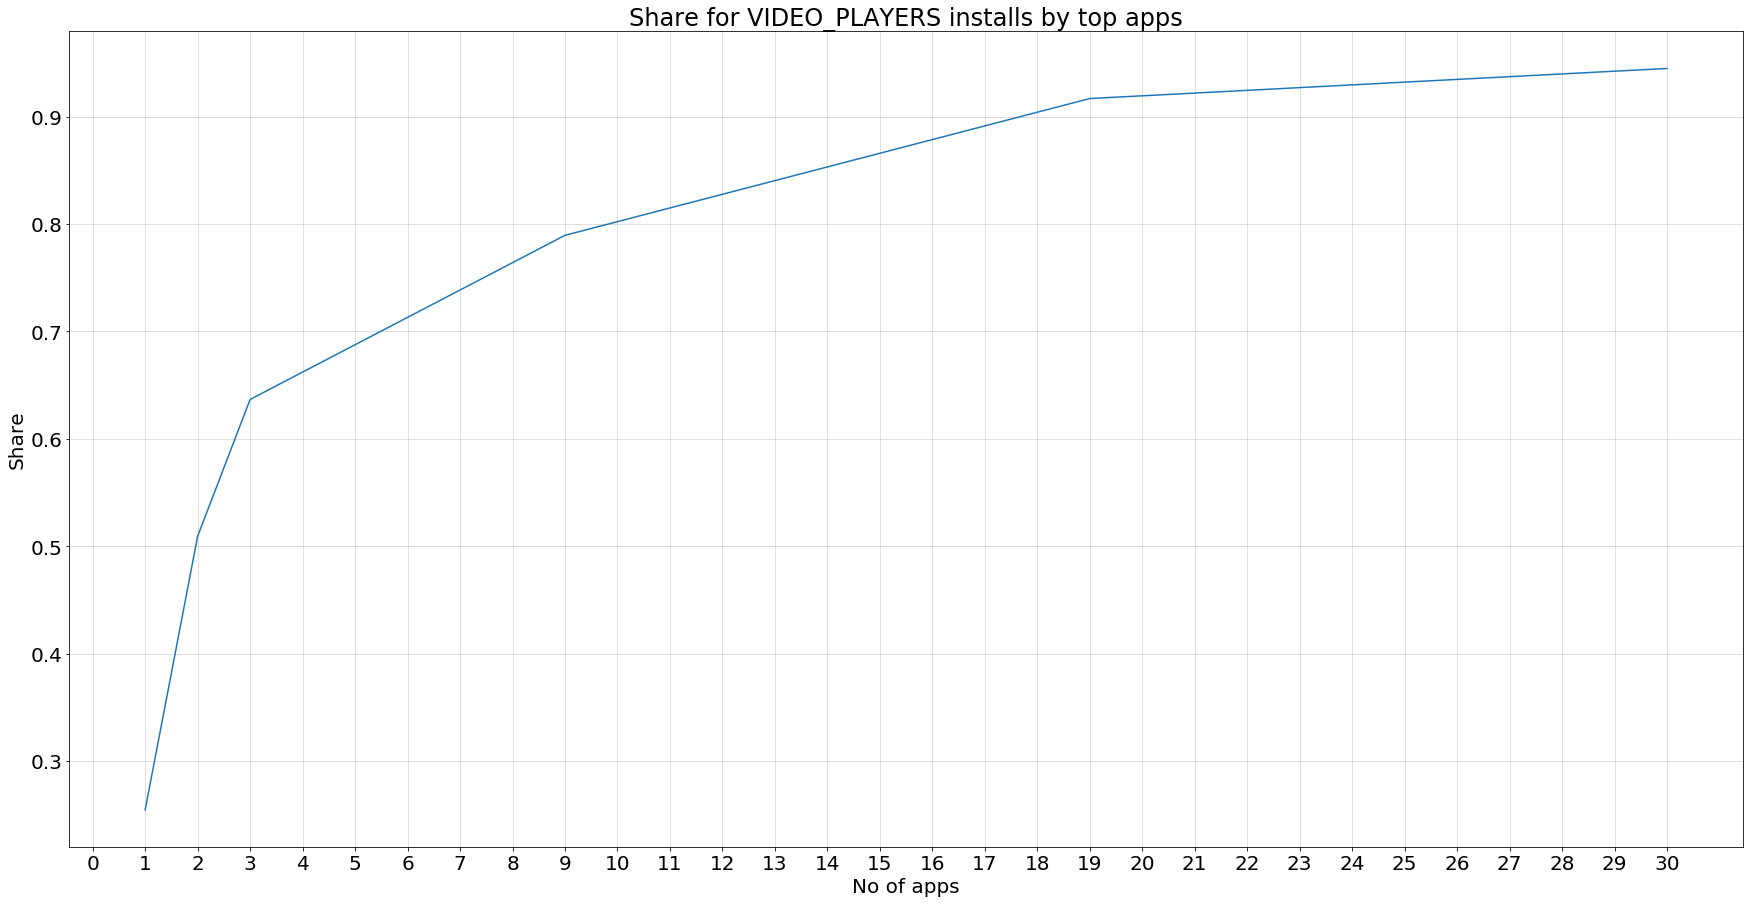

In [83]:
plot_sum_share("VIDEO_PLAYERS",30)

In [84]:
android[android["Category"]=="VIDEO_PLAYERS"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
3703,MX Player,VIDEO_PLAYERS,4.5,6474426,NaN,500000000,Free,0.0,Everyone,Video Players & Editors,2018-08-06,Varies with device,Varies with device
3672,Motorola Gallery,VIDEO_PLAYERS,3.9,121916,23.0,100000000,Free,0.0,Everyone,Video Players & Editors,2016-01-25,Varies with device,Varies with device
3675,VLC for Android,VIDEO_PLAYERS,4.4,1032076,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,2018-07-30,Varies with device,2.3 and up
4032,Dubsmash,VIDEO_PLAYERS,4.2,1971777,29.0,100000000,Free,0.0,Teen,Video Players & Editors,2018-05-11,2.35.8,4.1 and up
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,4.6,9879473,40.0,100000000,Free,0.0,Teen,Video Players & Editors,2018-08-04,7.2.1,4.1 and up
3670,Motorola FM Radio,VIDEO_PLAYERS,3.9,54807,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",VIDEO_PLAYERS,4.6,4016834,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,2018-07-23,Varies with device,Varies with device
4038,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,9.7,50000000,Free,0.0,Everyone,Video Players & Editors,2018-07-30,1.7.1.3,5.0 and up
